In [10]:
!pip install scikit-learn matplotlib mglearn

# Import libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import mglearn

# Wave Dataset

Coefficient (w): [0.45053442]
Intercept (b): 0.06878142557298997

Training set score: 0.6327119618716126
Test set score: 0.6341586541145549


w[0]: 0.393906  b: -0.031804


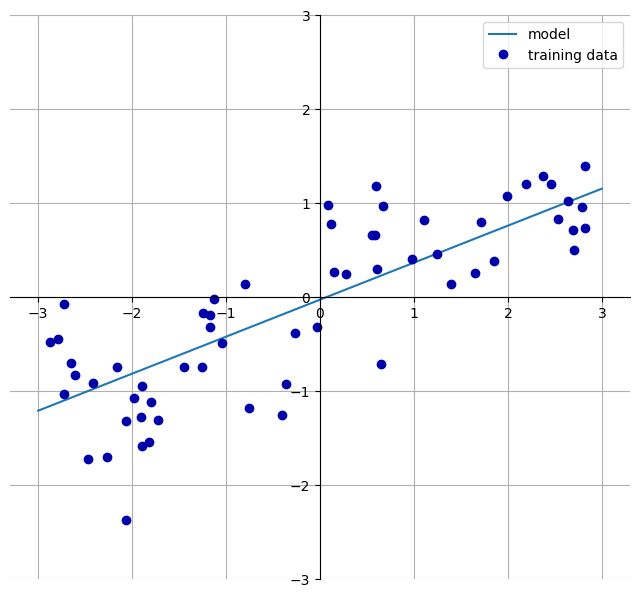

In [23]:
# OLS Model on One-dimensional wave dataset

X, y = mglearn.datasets.make_wave(n_samples=600)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# Print parameters
print("Coefficient (w):", lr.coef_)
print("Intercept (b):", lr.intercept_)

# Score
print("\nTraining set score:", lr.score(X_train, y_train))
print("Test set score:", lr.score(X_test, y_test))

# Plot
print("\n")
mglearn.plots.plot_linear_regression_wave()
plt.show()

# Boston Housing dataset

Coefficient (w): [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.1631

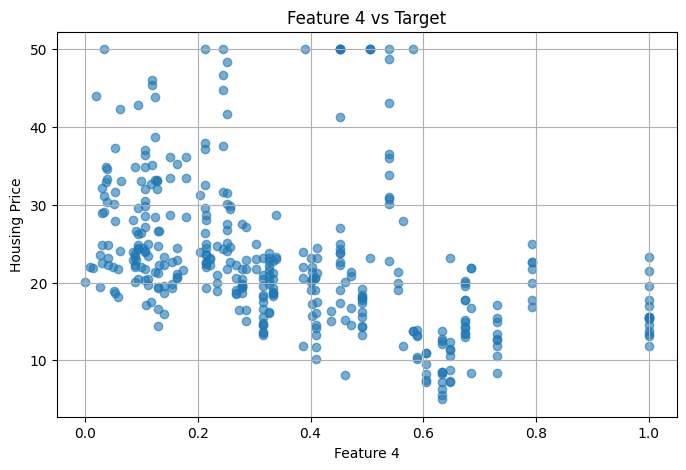

In [37]:
# Load Boston dataset with extended features
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the model
lr = LinearRegression().fit(X_train, y_train)

print("Coefficient (w):", lr.coef_)
print("Intercept (b):", lr.intercept_)

# Score
print("\nTraining set score:", lr.score(X_train, y_train))
print("Test set score:", lr.score(X_test, y_test))

print("\nX shape:", X.shape)



# Now try feature_index = 1 or any index up to 103
feature_index = 4

plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, feature_index], y_train, alpha=0.6)
plt.xlabel(f"Feature {feature_index}")
plt.ylabel("Housing Price")
plt.title(f"Feature {feature_index} vs Target")
plt.grid(True)
plt.show()


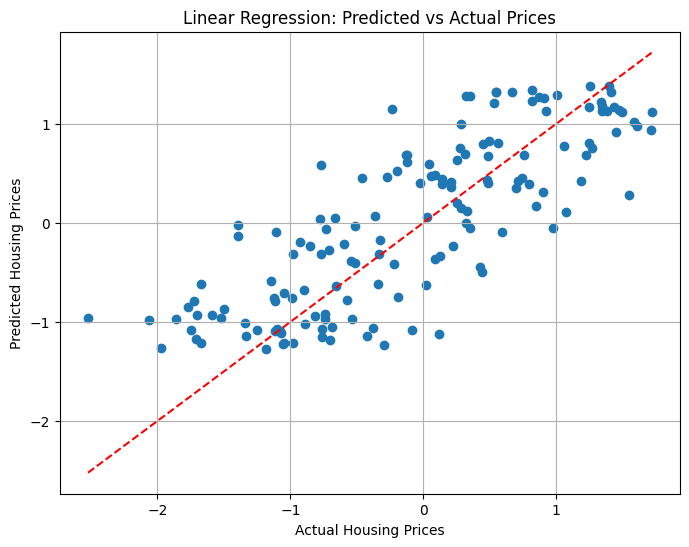

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train model
lr = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
# plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Actual Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Linear Regression: Predicted vs Actual Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()


#Ridge Regression

alpha=1.0
Training set score: 0.89
Test set score: 0.75
alpha=10
Training set score: 0.79
Test set score: 0.64
alpha=0.1
Training set score: 0.93
Test set score: 0.77


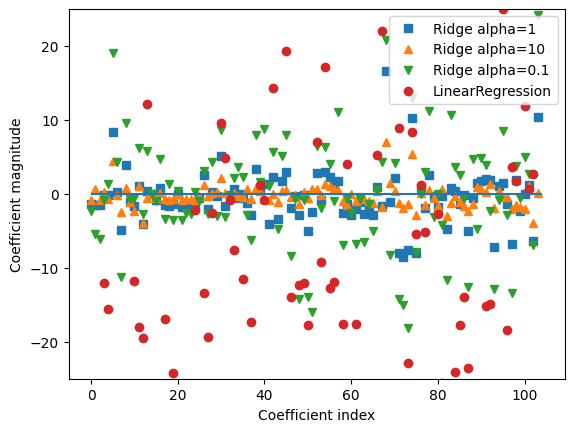

In [47]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)


ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("alpha=1.0")
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("alpha=10")
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("alpha=0.1")
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# Loss function for Linear Regression

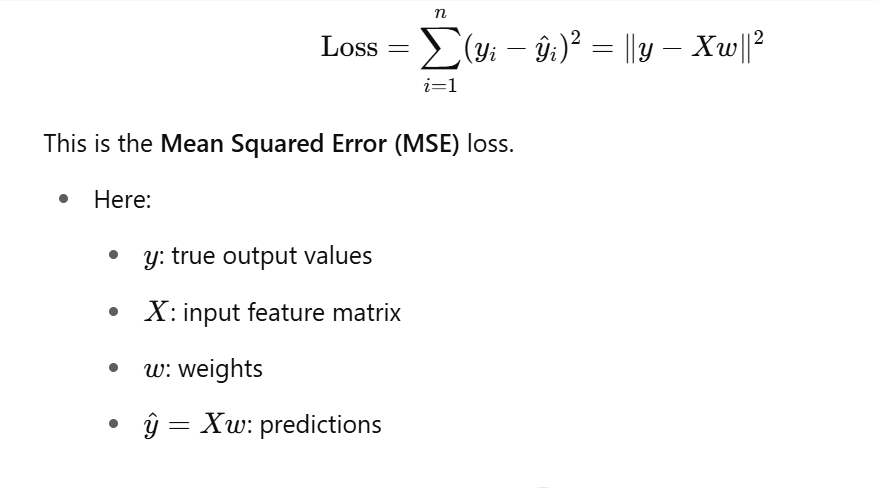

#Loss function for Ridge Regression

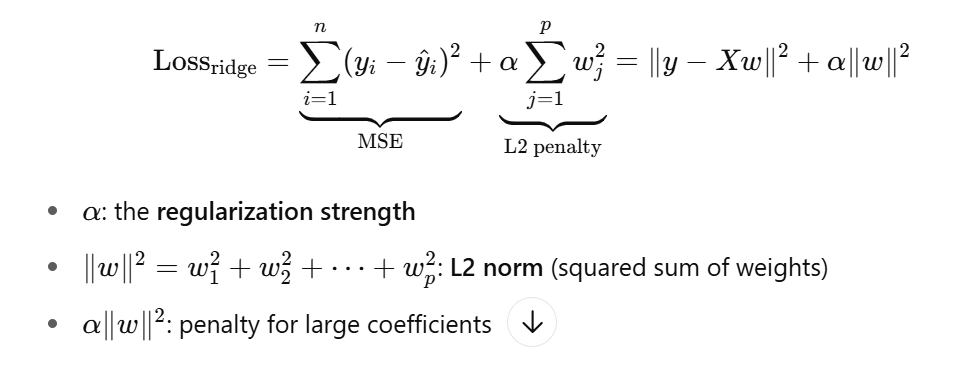

# Learning curves for ridge regression and linear regression on the Boston Housing dataset

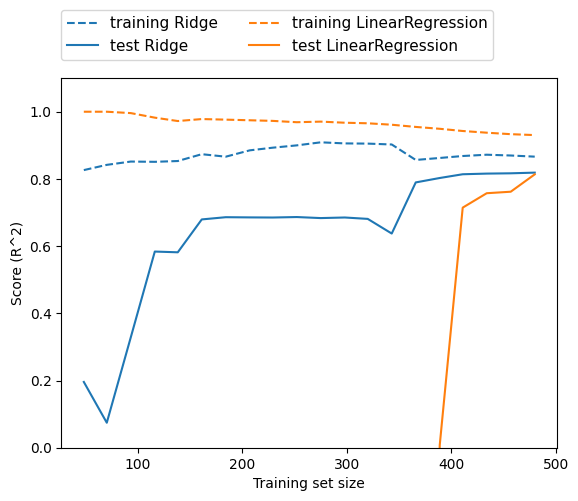

In [48]:
mglearn.plots.plot_ridge_n_samples()

#Lasso (L1 Regularization)

In [51]:
lasso = Lasso().fit(X_train, y_train)
print("alpha = 1.0")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\nalpha = 0.01")
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("\nalpha = 0.0001")
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

alpha = 1.0
Training set score: 0.29
Test set score: 0.21
Number of features used: 4

alpha = 0.01
Training set score: 0.90
Test set score: 0.77
Number of features used: 33

alpha = 0.0001
Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

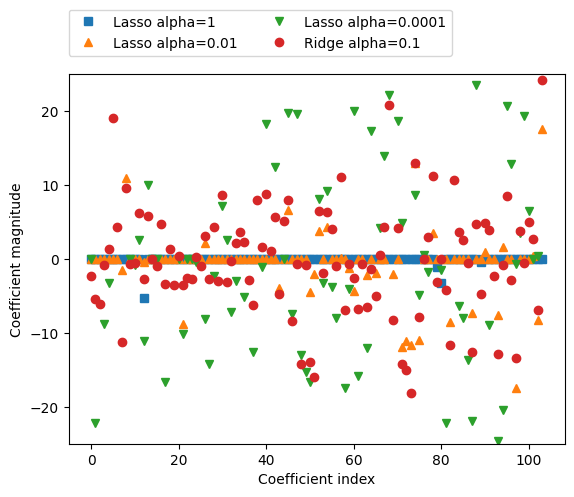

In [52]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Loss function for L1 Regularization
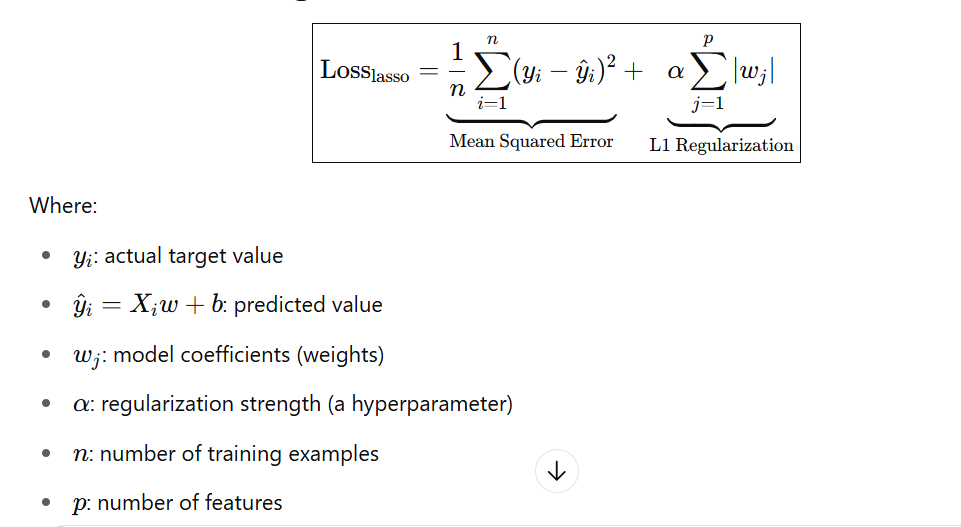